# Data Analysis Assignment

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing Dataset

In [2]:
df = pd.read_csv('insurance.csv')

### Exploratory data Analysis

veiw of the data

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Take a look at the info of the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


There are no null values. (which is good!!)

We use `describe` method to see the statistics of the data

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


let's view the data types

In [6]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

So far all data types are correct, later we may need to covert some dummy columns



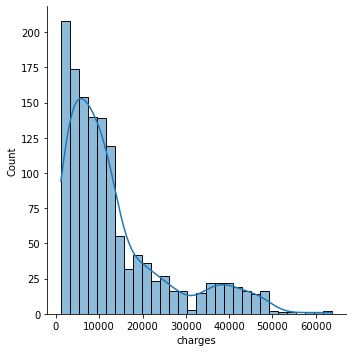

In [7]:
sns.displot(df['charges'], kde=True,)

<AxesSubplot:xlabel='age', ylabel='charges'>

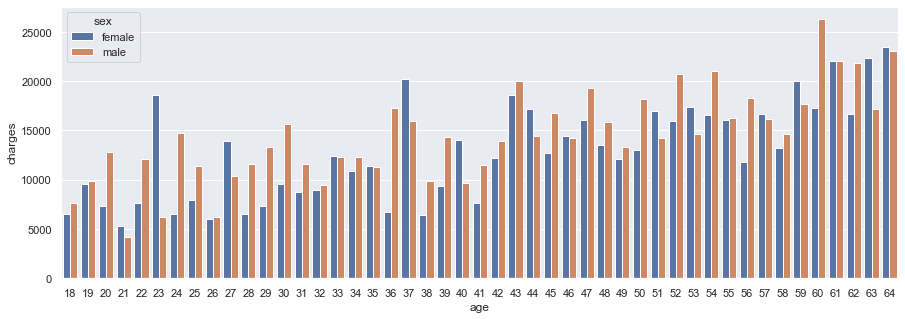

In [8]:
sns.set()
plt.figure(figsize=(15,5))
sns.barplot(x=df['age'], y=df['charges'], data=df, hue=df['sex'], ci=None)

<AxesSubplot:xlabel='age', ylabel='charges'>

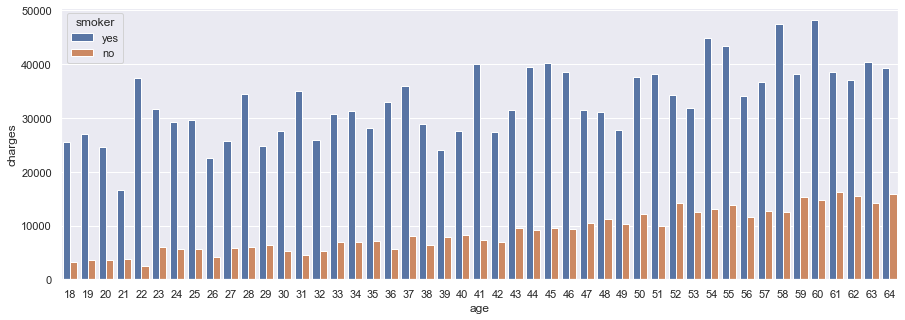

In [9]:
sns.set()
plt.figure(figsize=(15,5))
sns.barplot(x=df['age'], y=df['charges'], data=df, hue=df['smoker'], ci=None)

<AxesSubplot:xlabel='age', ylabel='charges'>

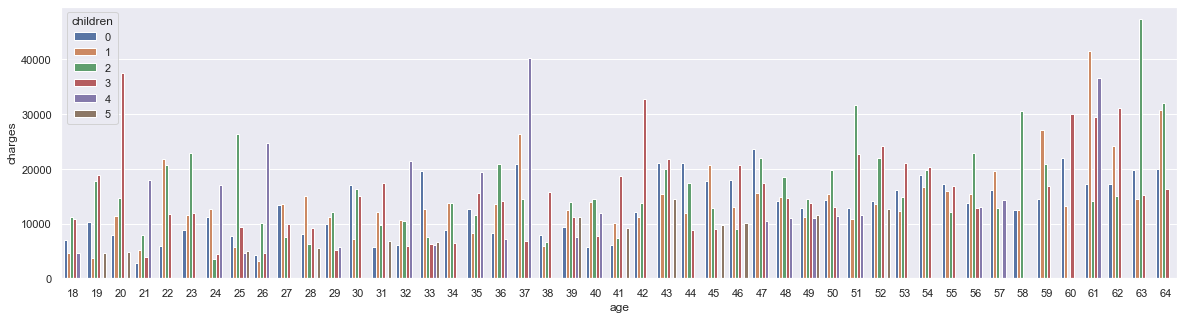

In [10]:
sns.set()
plt.figure(figsize=(20,5))
sns.barplot(x=df['age'], y=df['charges'], data=df, hue=df['children'], ci=None)

<AxesSubplot:xlabel='region', ylabel='charges'>

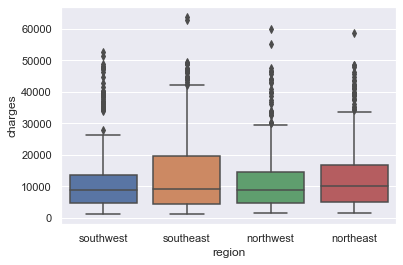

In [11]:
sns.boxplot(x=df['region'], y=df['charges'], data=df)

<AxesSubplot:xlabel='bmi', ylabel='charges'>

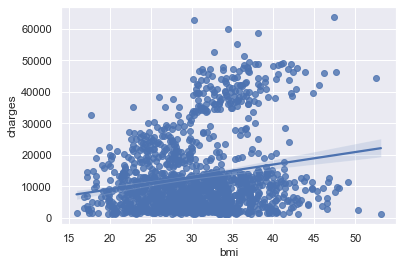

In [12]:
sns.regplot(x=df['bmi'], y=df['charges'], data=df)

In [13]:
df[['bmi', 'charges']].corr()

,bmi,charges
bmi,1.000000,0.198341
charges,0.198341,1.000000


<AxesSubplot:xlabel='age', ylabel='bmi'>

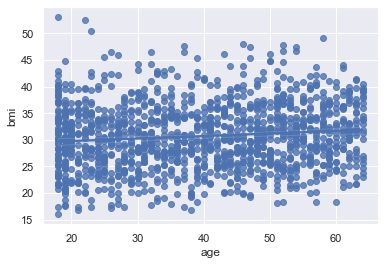

In [14]:
sns.regplot(x=df['age'], y=df['bmi'], data=df)

In [15]:
df[['age','bmi']].corr()

,age,bmi
age,1.000000,0.109272
bmi,0.109272,1.000000


<AxesSubplot:xlabel='sex', ylabel='charges'>

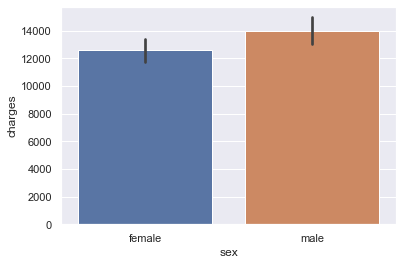

In [16]:
sns.barplot(x=df['sex'], y=df['charges'], data=df)

<AxesSubplot:>

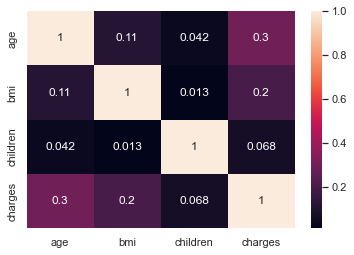

In [17]:
sns.heatmap(df.corr(), annot=True)

### Data Wrangling

In [18]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [19]:
gender=pd.get_dummies(df['sex'], drop_first=True)
gender

,male
0,0
1,1
2,1
3,1
4,1
...,...
1333,1
1334,0
1335,0
1336,0


In [20]:
df['sex']=gender
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [21]:
df['smoker']=pd.get_dummies(df['smoker'], drop_first=True)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [22]:
df.drop(labels='region', axis=1, inplace=True)
df.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [41]:
df.corr()

,age,sex,bmi,children,smoker,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000


<AxesSubplot:>

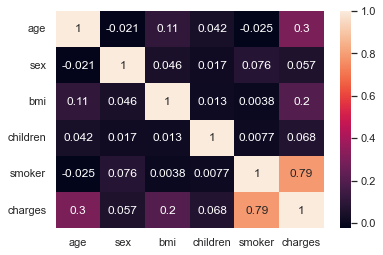

In [23]:
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='children', ylabel='charges'>

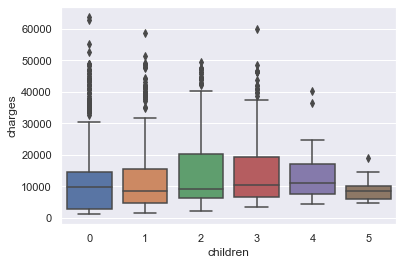

In [24]:
sns.boxplot(x=df['children'], y=df['charges'], data=df)

<AxesSubplot:xlabel='smoker', ylabel='charges'>

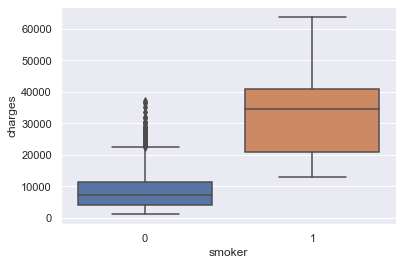

In [25]:
sns.boxplot(x=df['smoker'], y=df['charges'], data=df)

<AxesSubplot:xlabel='sex', ylabel='charges'>

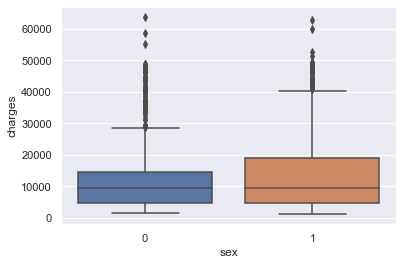

In [26]:
sns.boxplot(x=df['sex'], y=df['charges'], data=df)

### Model Development

In [43]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(df.drop('charges', axis=1), df['charges'], test_size=0.3, random_state=50)

In [44]:
df.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [45]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)

In [46]:
from sklearn.metrics import r2_score
print('The accuracy is ',r2_score(y_test, y_pred))

The accuracy is  0.7836766591357426


In [47]:
LR.score(x_test,y_test)

0.7836766591357426

C:\JupyterLab\resources\jlab_server\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\JupyterLab\resources\jlab_server\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


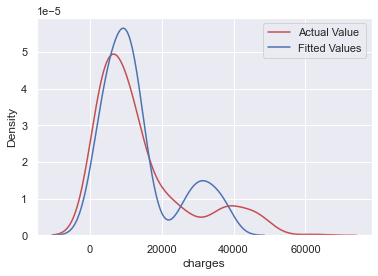

In [48]:
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.legend()

In [49]:
from sklearn.preprocessing import PolynomialFeatures

In [50]:
pr = PolynomialFeatures()
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
pr

PolynomialFeatures()

In [51]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [52]:
yhat = poly.predict(x_test_pr)

In [53]:
print('The accuracy is ',r2_score(y_test, yhat))

The accuracy is  0.8567673112861601


C:\JupyterLab\resources\jlab_server\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\JupyterLab\resources\jlab_server\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


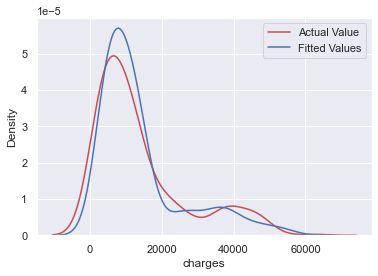

In [54]:
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.legend()

In [55]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
poly = LinearRegression()
poly.fit(x_train_pr, y_train)
yhat = poly.predict(x_test_pr)
print('The accuracy is ',r2_score(y_test, yhat))

The accuracy is  0.7145314019318537


C:\JupyterLab\resources\jlab_server\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\JupyterLab\resources\jlab_server\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


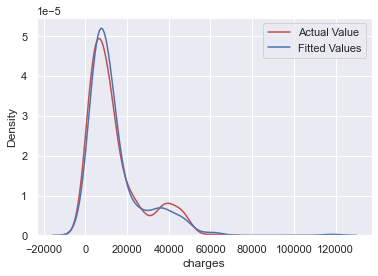

In [56]:
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.legend()

In [62]:
from sklearn.tree import DecisionTreeRegressor

In [63]:
dt=DecisionTreeRegressor()

In [64]:
dt.fit(x_train, y_train)
dt_predict=dt.predict(x_test)

In [65]:
print('The accuracy is ',r2_score(y_test, dt_predict))

The accuracy is  0.7178607645788693


C:\JupyterLab\resources\jlab_server\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\JupyterLab\resources\jlab_server\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


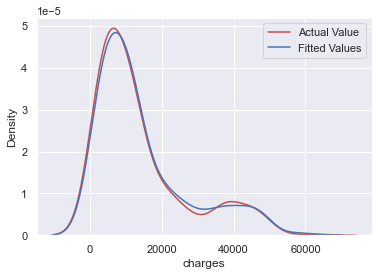

In [66]:
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(dt_predict, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.legend()